## Data Prep

In [ ]:
import pandas as pd
data = pd.read_csv('PC_data.csv', index_col=0)
data.head(3)

,First,Second,Third,Fourth,Fifth,gross_income
0,14.716475,6.337840,0.233860,-5.483357,-2.700865,105943
1,-0.189993,1.937290,0.909716,-3.196348,0.501330,101740
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963,96130


In [ ]:
x = data.iloc[:, :5]
x

,First,Second,Third,Fourth,Fifth
0,14.716475,6.337840,0.233860,-5.483357,-2.700865
1,-0.189993,1.937290,0.909716,-3.196348,0.501330
2,-4.294988,-0.163719,-0.097096,0.904545,-0.622963
3,-1.392339,-0.736245,0.577312,-1.434435,0.698146
4,-5.451181,0.097442,0.699995,0.421614,0.575257
...,...,...,...,...,...
3404,-6.056077,-0.725316,1.511829,0.431562,1.374583
3405,-3.742755,-1.085177,1.584564,-1.451893,1.516538
3406,-2.295683,-1.236968,0.392438,-0.667328,1.463892
3407,-2.337155,-1.164427,0.413527,-0.622205,1.636979


In [ ]:
y = data[['gross_income']]
y

,gross_income
0,105943
1,101740
2,96130
3,92189
4,91199
...,...
3404,17232
3405,17144
3406,16667
3407,15687


##Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [ ]:
from pandas.core.window.rolling import numba_notes
#Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor as XGBRegressor
#Linear Regression ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Ridge Regression ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html )
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
#Lasso Regression ( https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d )
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
lasso = linear_model.Lasso(alpha=0.1)
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
#Random Forrest ( https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 )
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Decision Trees ( https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16 )
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#SVM - SVR
from sklearn import svm
SVM = svm.SVR()
#Gradient Boosting Regressor ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor )
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
# create an xgboost regression model: higher performance than gradient boosting
import xgboost as xg
xgb = xg.XGBRegressor()

In [ ]:
model_names = ['Multiple Regression', 'Ridge Regression', 'Lasso Regression', 'KNeighborsRegressor', 'Random Forrest', 'Decision Trees', 'SVM - SVR', 'Gradient Boosting Regressor', 'XGBoost']
models = [lm, ridge, lasso, neigh, rf, dt, SVM, gbr, xgb]

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
model_eval = []
for model in models:
  model.fit(X_train, y_train)
  predictions = model.predict(X_val)
  type(predictions)
  # Calculate the absolute errors
  errors = abs(predictions - y_val.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_val, predictions)
  mse = mean_squared_error(y_val, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_val, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

MODEL: LinearRegression()
Mean Absolute Error:  7519.468550293944  degrees.
Mean Squared Error: 94757233.7251167  degrees
RMSE: 9734.3327313749  degrees
R2: 0.27748212631298164
MODEL: Ridge(alpha=0.5)
Mean Absolute Error:  7519.489171724671  degrees.
Mean Squared Error: 94757348.93432851  degrees
RMSE: 9734.338649046915  degrees
R2: 0.27748124785007733
MODEL: Lasso(alpha=0.1)
Mean Absolute Error:  7519.477366245763  degrees.
Mean Squared Error: 94757246.51670077  degrees
RMSE: 9734.333388409335  degrees
R2: 0.27748202877796757
MODEL: KNeighborsRegressor(n_neighbors=2)
Mean Absolute Error:  8619.75073313783  degrees.
Mean Squared Error: 133208739.30351906  degrees
RMSE: 11541.609043089229  degrees
R2: -0.01570815540382009


<ipython-input-16-460022245cb1>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


MODEL: RandomForestRegressor()
Mean Absolute Error:  6773.8915249266865  degrees.
Mean Squared Error: 79966314.71329471  degrees
RMSE: 8942.388646960873  degrees
R2: 0.39026194199755304
MODEL: DecisionTreeRegressor()
Mean Absolute Error:  9258.727272727272  degrees.
Mean Squared Error: 166670558.36363637  degrees
RMSE: 12910.095211253725  degrees
R2: -0.2708523951264632


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: SVR()
Mean Absolute Error:  8980.012870414657  degrees.
Mean Squared Error: 130203230.46406555  degrees
RMSE: 11410.663015971752  degrees
R2: 0.00720865812757665


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: GradientBoostingRegressor(random_state=0)
Mean Absolute Error:  6844.61500605772  degrees.
Mean Squared Error: 79340893.31078684  degrees
RMSE: 8907.350521383272  degrees
R2: 0.39503074036928687
MODEL: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error:  7442.827787069282  degrees.


In [ ]:
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,LinearRegression(),7519.468550,9.475723e+07,9734.332731,0.277482
1,Ridge(alpha=0.5),7519.489172,9.475735e+07,9734.338649,0.277481
2,Lasso(alpha=0.1),7519.477366,9.475725e+07,9734.333388,0.277482
3,KNeighborsRegressor(n_neighbors=2),8619.750733,1.332087e+08,11541.609043,-0.015708
4,"(DecisionTreeRegressor(max_features=1.0, rando...",6773.891525,7.996631e+07,8942.388647,0.390262
5,DecisionTreeRegressor(),9258.727273,1.666706e+08,12910.095211,-0.270852
6,SVR(),8980.012870,1.302032e+08,11410.663016,0.007209
7,([DecisionTreeRegressor(criterion='friedman_ms...,6844.615006,7.934089e+07,8907.350521,0.395031
8,"XGBRegressor(base_score=None, booster=None, ca...",7442.827787,9.439620e+07,9715.770722,0.280235


In [ ]:
#crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
GBR=GradientBoostingRegressor(random_state=0)
search_grid={'n_estimators':range(20,81,20),'learning_rate':[0.01, 0.1, 0.25, 0.5, 1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [ ]:
# Fit grid search
grid_result = search.fit(X_train, y_train)
# Print grid search summary
grid_result

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.25, 0.5, 1],
                         'n_estimators': range(20, 81, 20)},
             scoring='neg_mean_squared_error')

In [ ]:
# print best parameter after tuning
print(grid_result.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_result.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 80}
GradientBoostingRegressor(n_estimators=80, random_state=0)


##Feature Importance

In [ ]:
#Installation
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.3 MB/s eta 0:00:00


In [ ]:
#Installation
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=80, random_state=0)

In [ ]:
x_train_here = X_train.values
y_train_here = y_train.values.ravel()

X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without feature names
X has feature names, but GradientBoostingRegressor was fitted without featur

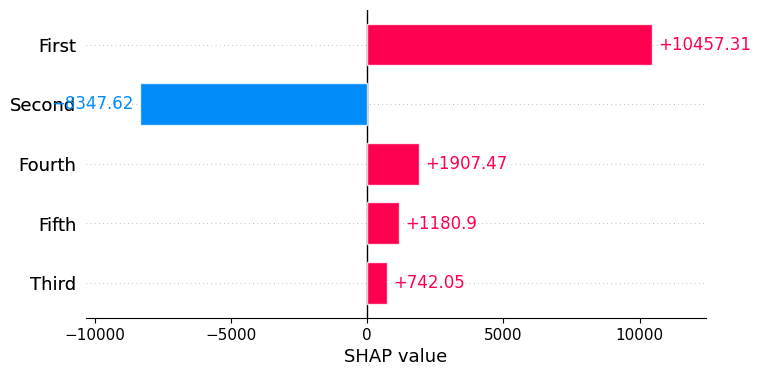

In [ ]:
gbr.fit(x_train_here, y_train_here)
explainer = shap.Explainer(gbr.predict, X_val)
shap_values = explainer(X_val)
shap.plots.bar(shap_values[0])

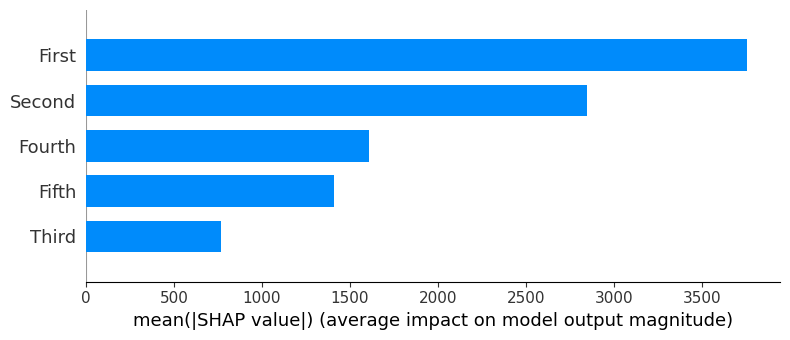

In [ ]:
shap.summary_plot(shap_values, X_val, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


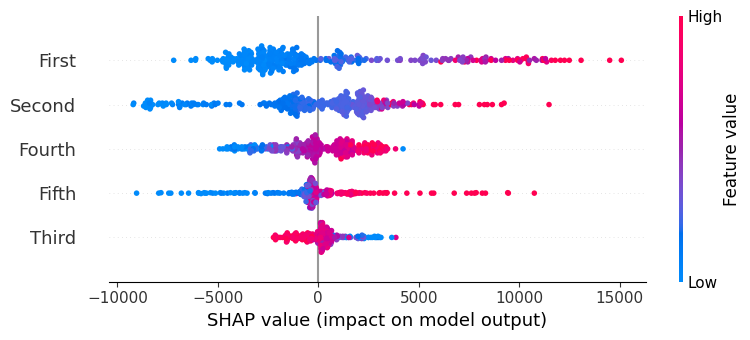

In [ ]:
shap.summary_plot(shap_values, X_val)

In [ ]:
gbr.feature_importances_

array([0.32356312, 0.2688342 , 0.10239676, 0.15033505, 0.15487088])

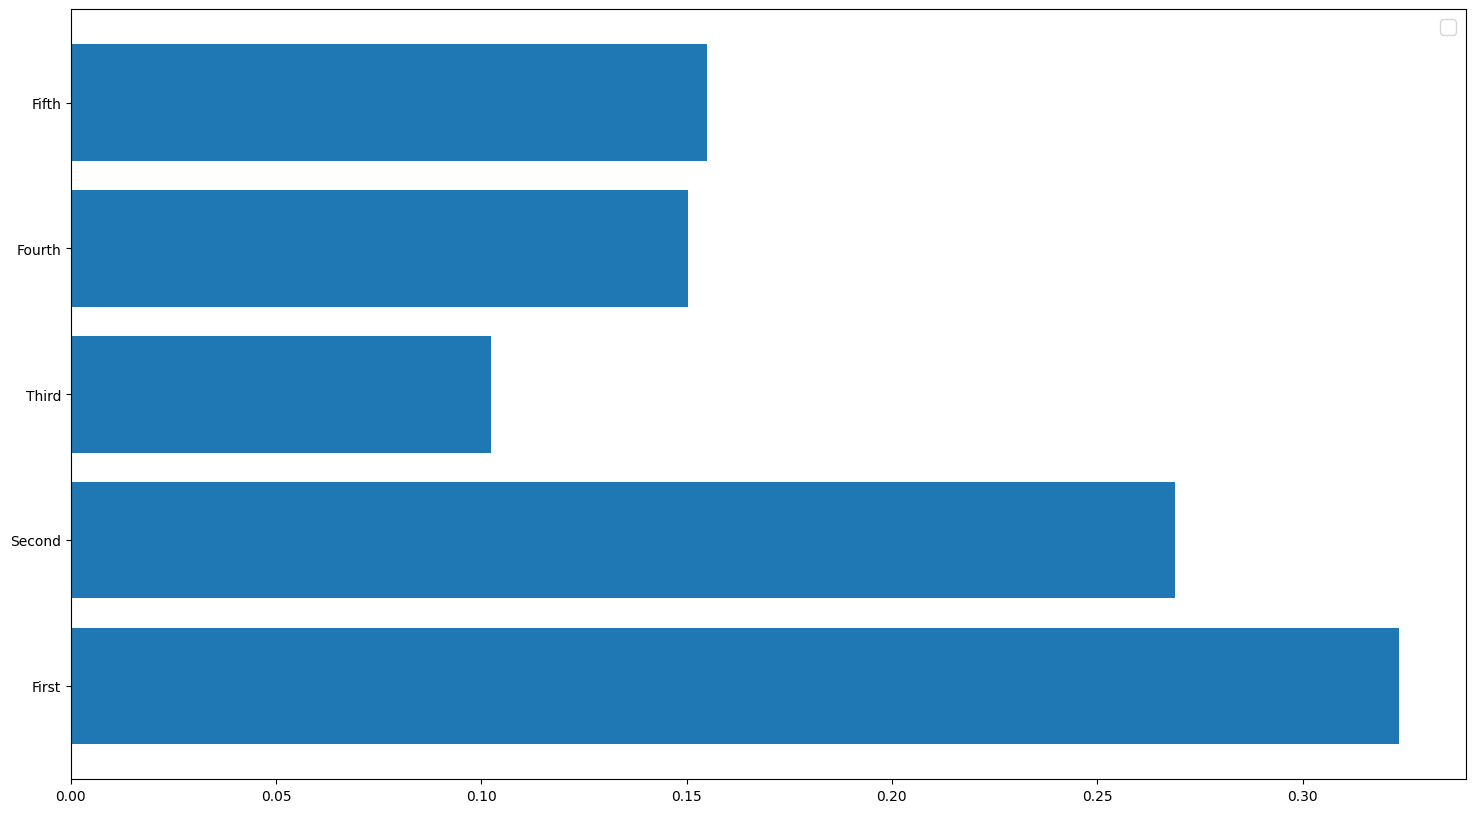

In [ ]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(X_train.columns, gbr.feature_importances_)
ax.legend(fontsize = 14)